# Face Recognition

In [47]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [54]:
subscription_key ='18386ea129ab4527a06024849ee09c6e'
face_api_url = 'https://labuser8face.cognitiveservices.azure.com/face/v1.0/detect'
image_url ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTVVqVf0M0Hueo3RzqjSrEVMA9q-RO74-8NIQ&usqp=CAU'

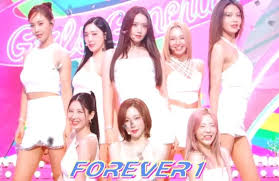

In [55]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [64]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'Smile'
}
data = {'url': image_url}

In [65]:
response = requests.post(face_api_url, params=params, headers=headers,json=data)
faces = response.json()
faces

[]

In [60]:
draw = ImageDraw.Draw(image)

In [61]:
def DrawBox(faces):
    
    for face in faces:
        rect = face['faceFectangle']
        left = rect['left']
        top = rect['tip']
        width = rect['width']
        height = rect['height']

        draw.rectangle(((left,top),(left+width,top+height)), outline='red')

        face_attributes = face['faceAttributes']
        smile = face_attributes['smile']
        draw.text((left,top),smile,fill='red')